# 🚀 Forward Propagation: พื้นฐานการทำนายใน Neural Network

**จุดประสงค์**: เข้าใจ Forward Propagation - วิธีที่ Neural Network ทำนายผลลัพธ์

**โค้ดต้นฉบับ**: `machine_learning_examples-master/ann_class/forwardprop.py`

---

## 🎯 Forward Propagation คืออะไร?

**Forward Propagation** = ส่งข้อมูลผ่าน Neural Network เพื่อได้ **prediction**

### 📚 แนวคิดพื้นฐาน:

```
Input (X) → Hidden Layer (Z) → Output (Y)
```

**ขั้นตอน**:
1. **รับ Input**: ข้อมูล X (เช่น ตำแหน่ง x, y)
2. **คำนวณ Hidden Layer**: $Z = \sigma(X \cdot W1 + b1)$ ← sigmoid
3. **คำนวณ Output**: $Y = \text{softmax}(Z \cdot W2 + b2)$
4. **ได้ Prediction**: class ที่มี probability สูงสุด

---

## 🔍 ความแตกต่างจาก Backpropagation:

| | Forward Propagation | Backpropagation |
|---|---|---|
| **ทิศทาง** | Input → Output | Output → Input |
| **จุดประสงค์** | ทำนาย | เรียนรู้ (อัปเดต weights) |
| **Output** | Prediction (Y) | Gradients (dW, db) |
| **ใช้เมื่อ** | Testing, Inference | Training |

---

## 🏗️ Network Architecture

```
Input (2D)  →  Hidden Layer (3 neurons, sigmoid)  →  Output (3 classes, softmax)
   X (N,2)         Z (N,3)                              Y (N,3)
              W1(2,3), b1(3)                        W2(3,3), b2(3)
```

### สูตร:

**Hidden Layer**:
$$Z = \sigma(X \cdot W1 + b1)$$

โดย $\sigma(x) = \frac{1}{1 + e^{-x}}$ (sigmoid)

**Output Layer**:
$$Y = \text{softmax}(Z \cdot W2 + b2)$$

โดย $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum e^{x_j}}$

---

## 📊 ข้อมูล

- **3 classes**: แต่ละ class มี 500 samples
- **2D input**: (x, y) coordinates
- **Task**: จำแนกว่าจุดอยู่ class ไหน

💡 **คำถาม**: ถ้าใช้ weights แบบสุ่ม (ยังไม่ train) → accuracy จะได้เท่าไหร่?

## 📦 Step 1: เตรียมความพร้อม

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import sys
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าฟอนต์ไทย
font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# เพิ่ม path
sys.path.append('../../machine_learning_examples-master')

# Set seed for reproducibility
np.random.seed(42)

print("✅ พร้อมเรียนรู้ Forward Propagation!")

✅ พร้อมเรียนรู้ Forward Propagation!


## 🔢 Step 2: สร้างข้อมูล (3 Classes)

**แนวคิด**: สร้าง 3 กลุ่มข้อมูล แต่ละกลุ่มอยู่คนละตำแหน่ง

- **Class 0** (สีม่วง): อยู่ล่าง (center = [0, -2])
- **Class 1** (สีเหลือง): อยู่ขวาบน (center = [2, 2])
- **Class 2** (สีเขียว): อยู่ซ้ายบน (center = [-2, 2])

In [3]:
# สร้างข้อมูล
Nclass = 500  # จำนวน samples ต่อ class

# สร้าง 3 clusters
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])   # Class 0: ล่าง
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])    # Class 1: ขวาบน
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])   # Class 2: ซ้ายบน

# รวมข้อมูล
X = np.vstack([X1, X2, X3])
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

print(f"✅ สร้างข้อมูลเรียบร้อย!")
print(f"📌 Total samples: {len(Y)}")
print(f"📌 X shape: {X.shape} (N x D)")
print(f"📌 Y shape: {Y.shape}")
print(f"📌 Class distribution:")
print(f"   - Class 0: {(Y==0).sum()} samples")
print(f"   - Class 1: {(Y==1).sum()} samples")
print(f"   - Class 2: {(Y==2).sum()} samples")

✅ สร้างข้อมูลเรียบร้อย!
📌 Total samples: 1500
📌 X shape: (1500, 2) (N x D)
📌 Y shape: (1500,)
📌 Class distribution:
   - Class 0: 500 samples
   - Class 1: 500 samples
   - Class 2: 500 samples


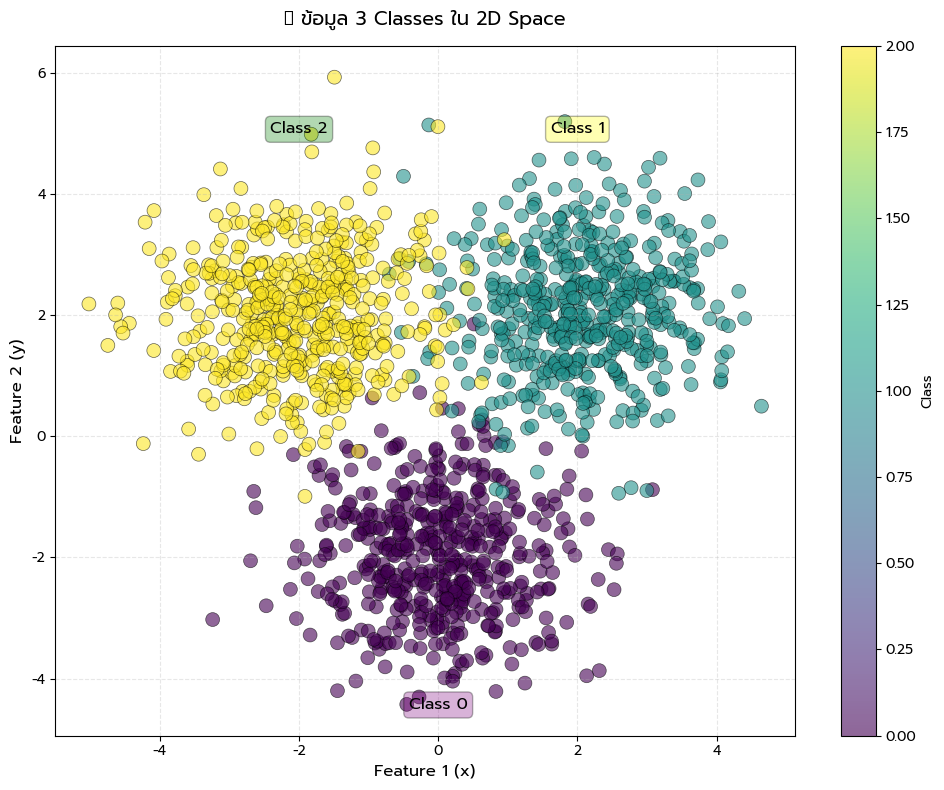

In [4]:
# Visualize ข้อมูล
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.5)
plt.colorbar(label='Class')
plt.title('📊 ข้อมูล 3 Classes ใน 2D Space', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Feature 1 (x)', fontsize=12)
plt.ylabel('Feature 2 (y)', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')

# เพิ่ม text บอกแต่ละ class
plt.text(0, -4.5, 'Class 0', fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='purple', alpha=0.3))
plt.text(2, 5, 'Class 1', fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
plt.text(-2, 5, 'Class 2', fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))

plt.tight_layout()
plt.show()

## 🏋️ Step 3: Initialize Weights (Random)

**แนวคิด**: สุ่ม weights เริ่มต้น **โดยยังไม่ได้ train**

💡 **คำถาม**: ถ้าใช้ weights แบบสุ่ม → accuracy จะได้เท่าไหร่?
- **ถ้าเดาสุ่ม**: accuracy ≈ 33.33% (1/3)
- **ถ้า forward prop ด้วย random weights**: accuracy ≈ ??

มาดูกัน!

In [5]:
# กำหนด dimensions
D = 2  # จำนวน input features
M = 3  # จำนวน hidden neurons
K = 3  # จำนวน output classes

# สุ่ม weights แบบสุ่ม (ยังไม่ได้ train)
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

print("✅ Randomly initialized weights!")
print(f"")
print(f"📌 W1 shape: {W1.shape} (D x M) = (2 x 3)")
print(f"📌 b1 shape: {b1.shape} (M,) = (3,)")
print(f"📌 W2 shape: {W2.shape} (M x K) = (3 x 3)")
print(f"📌 b2 shape: {b2.shape} (K,) = (3,)")
print(f"")
print(f"💡 ตัวอย่างค่า weights (สุ่ม):")
print(f"   W1[0] = {W1[0]}")
print(f"   b1 = {b1}")

✅ Randomly initialized weights!

📌 W1 shape: (2, 3) (D x M) = (2 x 3)
📌 b1 shape: (3,) (M,) = (3,)
📌 W2 shape: (3, 3) (M x K) = (3 x 3)
📌 b2 shape: (3,) (K,) = (3,)

💡 ตัวอย่างค่า weights (สุ่ม):
   W1[0] = [-1.90780756 -0.86038501 -0.41360553]
   b1 = [ 0.48603629 -1.54730399  1.08269105]


## 🔧 Step 4: สร้าง Helper Functions

### 4.1 Sigmoid Activation Function

**แนวคิด**: บังคับค่าให้อยู่ระหว่าง 0-1 และทำให้ non-linear

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

**ทำไมต้องใช้?**
- ถ้าไม่มี activation function → network เป็นแค่ linear transformation
- Sigmoid ทำให้ network เรียนรู้ non-linear patterns ได้

✅ Sigmoid function พร้อมแล้ว!

💡 ตัวอย่าง Sigmoid:
   σ(-10) = 0.0000
   σ( -1) = 0.2689
   σ(  0) = 0.5000
   σ(  1) = 0.7311
   σ( 10) = 1.0000


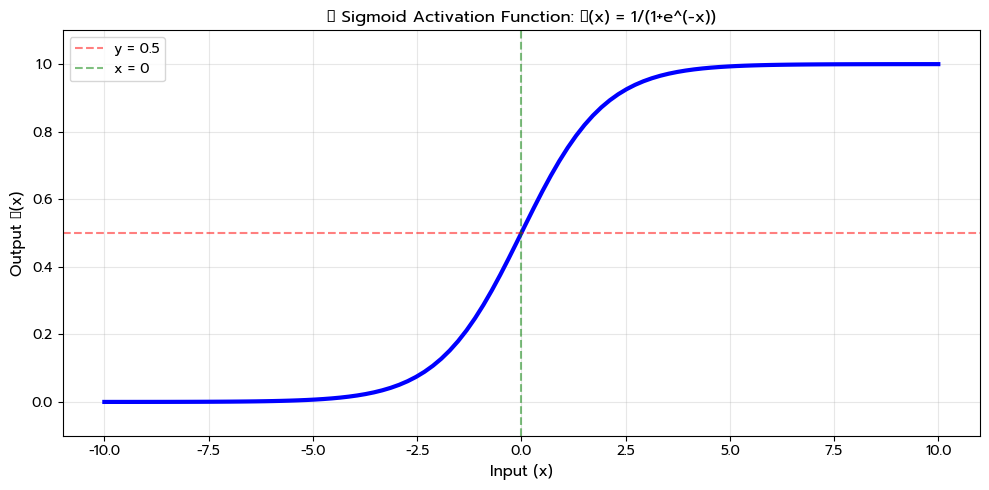


📊 สังเกต:
   • x → -∞ → σ(x) → 0
   • x → +∞ → σ(x) → 1
   • x = 0 → σ(x) = 0.5


In [6]:
def sigmoid(a):
    """
    Sigmoid activation function
    
    σ(x) = 1 / (1 + e^(-x))
    
    Properties:
    - Output range: (0, 1)
    - Smooth gradient
    - Non-linear
    """
    return 1 / (1 + np.exp(-a))

# ทดสอบ sigmoid
test_values = np.array([-10, -1, 0, 1, 10])
sigmoid_values = sigmoid(test_values)

print("✅ Sigmoid function พร้อมแล้ว!")
print("")
print("💡 ตัวอย่าง Sigmoid:")
for x, sig in zip(test_values, sigmoid_values):
    print(f"   σ({x:3d}) = {sig:.4f}")

# Plot sigmoid function
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, linewidth=3, color='blue')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='y = 0.5')
plt.axvline(x=0, color='green', linestyle='--', alpha=0.5, label='x = 0')
plt.title('📈 Sigmoid Activation Function: σ(x) = 1/(1+e^(-x))', fontsize=12, fontweight='bold')
plt.xlabel('Input (x)', fontsize=11)
plt.ylabel('Output σ(x)', fontsize=11)
plt.grid(alpha=0.3)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()

print("")
print("📊 สังเกต:")
print("   • x → -∞ → σ(x) → 0")
print("   • x → +∞ → σ(x) → 1")
print("   • x = 0 → σ(x) = 0.5")

### 4.2 Forward Propagation Function

**แนวคิด**: ส่งข้อมูลผ่าน network เพื่อได้ prediction

```
Step 1: X (N,2) · W1 (2,3) + b1 (3,) → (N,3)
Step 2: sigmoid(·) → Z (N,3)
Step 3: Z (N,3) · W2 (3,3) + b2 (3,) → (N,3)
Step 4: softmax(·) → Y (N,3) [probabilities]
```

In [7]:
def forward(X, W1, b1, W2, b2):
    """
    Forward Propagation ผ่าน Neural Network
    
    Architecture:
    Input X → Hidden Z (sigmoid) → Output Y (softmax)
    
    Parameters:
    - X: input (N, D)
    - W1, b1: hidden layer weights & bias
    - W2, b2: output layer weights & bias
    
    Returns:
    - Y: output probabilities (N, K) - softmax
    
    Steps:
    1. Hidden: Z = σ(X·W1 + b1)
    2. Output: A = Z·W2 + b2
    3. Softmax: Y = exp(A) / Σexp(A)
    """
    # Step 1: Hidden Layer with Sigmoid
    Z = sigmoid(X.dot(W1) + b1)
    
    # Alternative activations (commented out):
    # Z = np.tanh(X.dot(W1) + b1)  # tanh: range (-1, 1)
    # Z = np.maximum(X.dot(W1) + b1, 0)  # ReLU: max(0, x)
    
    # Step 2: Output Layer (linear)
    A = Z.dot(W2) + b2
    
    # Step 3: Softmax (แปลงเป็น probabilities)
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    
    return Y

print("✅ Forward function พร้อมแล้ว!")
print("")
print("💡 Forward Propagation ทำอะไร?")
print("   1. คำนวณ Hidden Layer: Z = σ(X·W1 + b1)")
print("   2. คำนวณ Output: A = Z·W2 + b2")
print("   3. แปลงเป็น Probabilities: Y = softmax(A)")
print("   4. ได้ prediction สำหรับแต่ละ class!")

✅ Forward function พร้อมแล้ว!

💡 Forward Propagation ทำอะไร?
   1. คำนวณ Hidden Layer: Z = σ(X·W1 + b1)
   2. คำนวณ Output: A = Z·W2 + b2
   3. แปลงเป็น Probabilities: Y = softmax(A)
   4. ได้ prediction สำหรับแต่ละ class!


💡 Forward Propagation ทำอะไร?
   1. คำนวณ Hidden Layer: Z = σ(X·W1 + b1)
   2. คำนวณ Output: A = Z·W2 + b2
   3. แปลงเป็น Probabilities: Y = softmax(A)
   4. ได้ prediction สำหรับแต่ละ class!


### 4.3 Classification Rate Function

**แนวคิด**: วัดว่าโมเดลทำนายถูกกี่ %

$$\text{Accuracy} = \frac{\text{จำนวนที่ทำนายถูก}}{\text{จำนวนทั้งหมด}}$$

In [8]:
def classification_rate(Y, P):
    """
    คำนวณ accuracy: จำนวนที่ทำนายถูก / จำนวนทั้งหมด
    
    Parameters:
    - Y: true labels (N,)
    - P: predicted labels (N,)
    
    Returns:
    - accuracy (float) in range [0, 1]
    """
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

print("✅ Classification rate function พร้อมแล้ว!")

✅ Classification rate function พร้อมแล้ว!


## 🎯 Step 5: ทำนายด้วย Random Weights (Forward Propagation)

**คำถาม**: ถ้าใช้ weights แบบสุ่ม (ยังไม่ได้ train) → accuracy จะได้เท่าไหร่?

**สมมติฐาน**:
- Random guessing: 33.33% (1/3)
- Forward prop with random weights: ??

มาดูผลลัพธ์กัน!

In [9]:
# Forward Propagation
P_Y_given_X = forward(X, W1, b1, W2, b2)

print("🚀 Forward Propagation เสร็จแล้ว!")
print("")
print(f"📌 Output shape: {P_Y_given_X.shape} (N x K)")
print(f"")
print(f"💡 ตัวอย่าง Output (Probabilities) สำหรับ 5 samples แรก:")
print(f"   (แต่ละแถว = probabilities สำหรับ 3 classes, ผรวม = 1)")
print("")
for i in range(5):
    print(f"   Sample {i}: P(class 0)={P_Y_given_X[i,0]:.3f}, P(class 1)={P_Y_given_X[i,1]:.3f}, P(class 2)={P_Y_given_X[i,2]:.3f} | Sum={P_Y_given_X[i].sum():.3f}")

# แปลง probabilities → predicted class
P = np.argmax(P_Y_given_X, axis=1)  # เลือก class ที่มี prob สูงสุด

# Verify
assert(len(P) == len(Y)), "Length mismatch!"

print("")
print(f"📌 Predicted classes (P) shape: {P.shape}")
print(f"   ตัวอย่าง 10 predictions แรก: {P[:10]}")
print(f"   ตัวอย่าง 10 true labels แรก: {Y[:10]}")

🚀 Forward Propagation เสร็จแล้ว!

📌 Output shape: (1500, 3) (N x K)

💡 ตัวอย่าง Output (Probabilities) สำหรับ 5 samples แรก:
   (แต่ละแถว = probabilities สำหรับ 3 classes, ผรวม = 1)

   Sample 0: P(class 0)=0.741, P(class 1)=0.166, P(class 2)=0.093 | Sum=1.000
   Sample 1: P(class 0)=0.594, P(class 1)=0.215, P(class 2)=0.191 | Sum=1.000
   Sample 2: P(class 0)=0.741, P(class 1)=0.164, P(class 2)=0.096 | Sum=1.000
   Sample 3: P(class 0)=0.688, P(class 1)=0.193, P(class 2)=0.119 | Sum=1.000
   Sample 4: P(class 0)=0.692, P(class 1)=0.172, P(class 2)=0.137 | Sum=1.000

📌 Predicted classes (P) shape: (1500,)
   ตัวอย่าง 10 predictions แรก: [0 0 0 0 0 0 0 0 0 0]
   ตัวอย่าง 10 true labels แรก: [0 0 0 0 0 0 0 0 0 0]


## 📊 Step 6: วัด Accuracy

**คำถาม**: ถ้าใช้ random weights → accuracy จะได้เท่าไหร่?

In [10]:
# คำนวณ accuracy
accuracy = classification_rate(Y, P)

print("="*70)
print("🎯 ผลลัพธ์: Classification Rate สำหรับ Random Weights")
print("="*70)
print(f"")
print(f"   Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   จำนวนที่ทำนายถูก: {int(accuracy*len(Y))}/{len(Y)} samples")
print(f"")
print("="*70)

# เปรียบเทียบกับ random guessing
random_guess_accuracy = 1.0 / K

print("")
print("💡 เปรียบเทียบ:")
print(f"   • Random Guessing: {random_guess_accuracy:.4f} ({random_guess_accuracy*100:.2f}%)")
print(f"   • Forward Prop (random weights): {accuracy:.4f} ({accuracy*100:.2f}%)")

if accuracy > random_guess_accuracy:
    print(f"   ✅ ดีกว่าการเดาสุ่ม! (ดีขึ้น {(accuracy-random_guess_accuracy)*100:.2f}%)")
elif accuracy < random_guess_accuracy:
    print(f"   ❌ แย่กว่าการเดาสุ่ม! (แย่ลง {(random_guess_accuracy-accuracy)*100:.2f}%)")
else:
    print(f"   ⚖️ เท่ากับการเดาสุ่ม")

print("")
print("🤔 ทำไม accuracy ไม่สูง?")
print("   → เพราะใช้ random weights (ยังไม่ได้ train!)")
print("   → ต้อง train ด้วย Backpropagation เพื่อปรับ weights")
print("   → ดู backprop.ipynb เพื่อเรียนรู้การ train!")

🎯 ผลลัพธ์: Classification Rate สำหรับ Random Weights

   Accuracy: 0.6533 (65.33%)
   จำนวนที่ทำนายถูก: 980/1500 samples


💡 เปรียบเทียบ:
   • Random Guessing: 0.3333 (33.33%)
   • Forward Prop (random weights): 0.6533 (65.33%)
   ✅ ดีกว่าการเดาสุ่ม! (ดีขึ้น 32.00%)

🤔 ทำไม accuracy ไม่สูง?
   → เพราะใช้ random weights (ยังไม่ได้ train!)
   → ต้อง train ด้วย Backpropagation เพื่อปรับ weights
   → ดู backprop.ipynb เพื่อเรียนรู้การ train!


## 📊 Step 7: Visualize Predictions

**แนวคิด**: ดูว่า random weights ทำนายอย่างไร

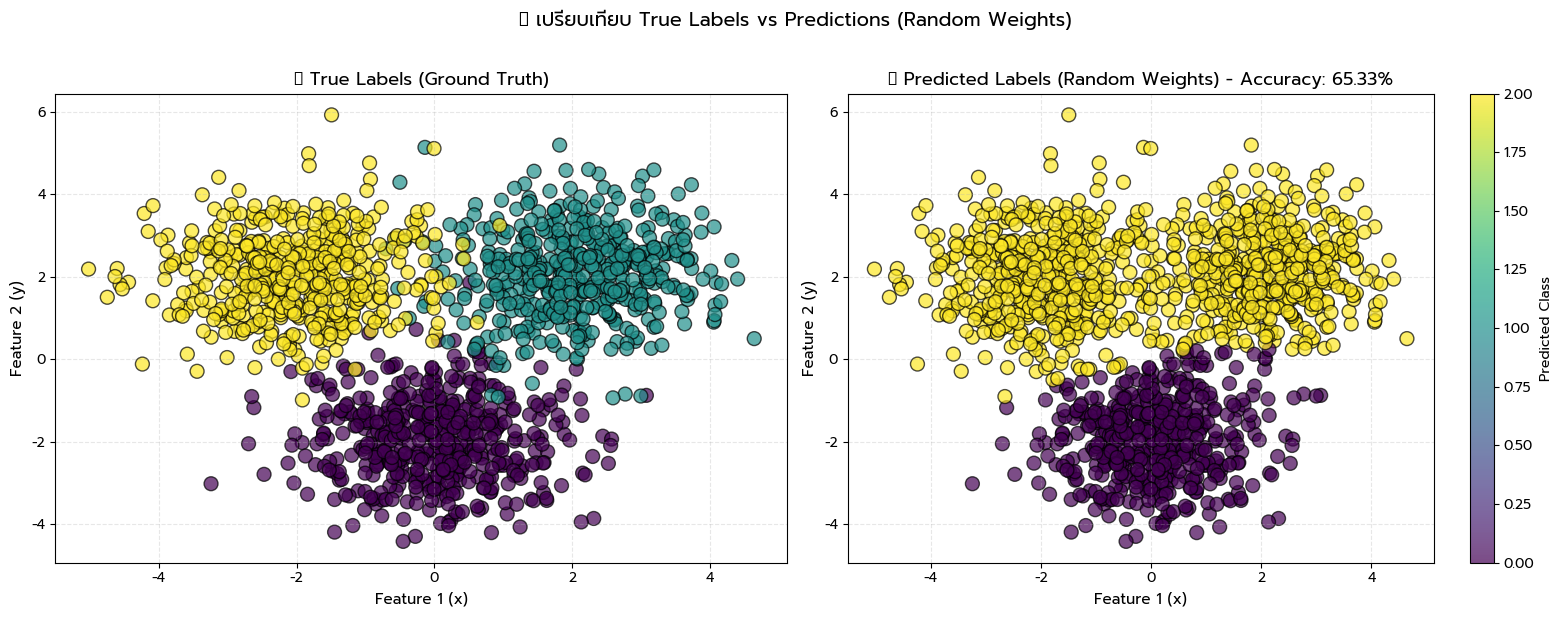

📊 สังเกต:
   • ซ้าย: ข้อมูลจริง (แบ่งแยกชัดเจน)
   • ขวา: prediction จาก random weights (ยังแบ่งไม่ดี)
   • ต้อง train เพื่อปรับ weights ให้ทำนายได้ดีขึ้น!


In [11]:
# Plot: True vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: True Labels
axes[0].scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.7, cmap='viridis', 
                edgecolors='black', linewidth=1)
axes[0].set_title('📌 True Labels (Ground Truth)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Feature 1 (x)', fontsize=11)
axes[0].set_ylabel('Feature 2 (y)', fontsize=11)
axes[0].grid(alpha=0.3, linestyle='--')

# Plot 2: Predicted Labels
scatter = axes[1].scatter(X[:,0], X[:,1], c=P, s=100, alpha=0.7, cmap='viridis', 
                          edgecolors='black', linewidth=1)
axes[1].set_title(f'🎯 Predicted Labels (Random Weights) - Accuracy: {accuracy*100:.2f}%', 
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Feature 1 (x)', fontsize=11)
axes[1].set_ylabel('Feature 2 (y)', fontsize=11)
axes[1].grid(alpha=0.3, linestyle='--')

plt.colorbar(scatter, ax=axes[1], label='Predicted Class')
plt.suptitle('📊 เปรียบเทียบ True Labels vs Predictions (Random Weights)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("📊 สังเกต:")
print("   • ซ้าย: ข้อมูลจริง (แบ่งแยกชัดเจน)")
print("   • ขวา: prediction จาก random weights (ยังแบ่งไม่ดี)")
print("   • ต้อง train เพื่อปรับ weights ให้ทำนายได้ดีขึ้น!")

## 🔍 Step 8: วิเคราะห์ Confusion Matrix

**แนวคิด**: ดูว่า class ไหนทำนายถูก/ผิดมากที่สุด

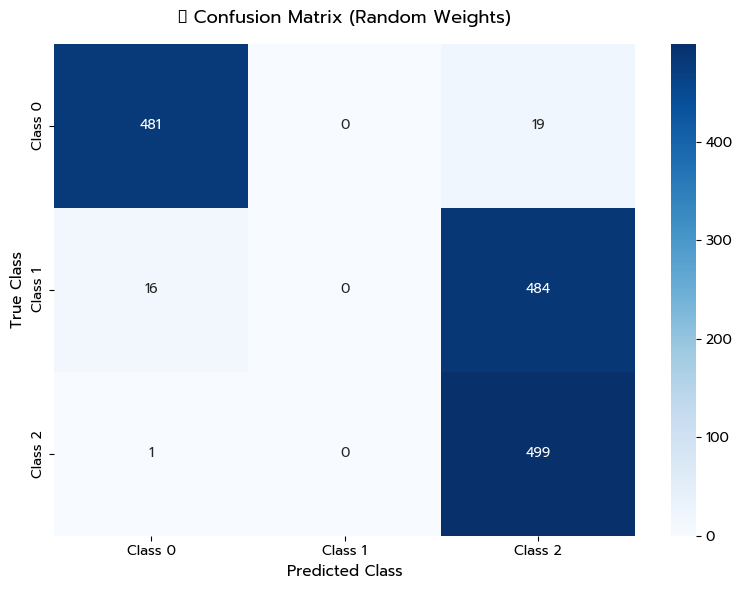

📊 Per-Class Accuracy:
   Class 0: 481/500 = 0.9620 (96.20%)
   Class 1: 0/500 = 0.0000 (0.00%)
   Class 2: 499/500 = 0.9980 (99.80%)

💡 Confusion Matrix อ่านยังไง?
   • แถว = True Class
   • คอลัมน์ = Predicted Class
   • เส้นทแยงมุม (diagonal) = ทำนายถูก
   • นอกเส้นทแยงมุม = ทำนายผิด


In [12]:
# สร้าง Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y, P)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('🔍 Confusion Matrix (Random Weights)', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Predicted Class', fontsize=11)
plt.ylabel('True Class', fontsize=11)
plt.tight_layout()
plt.show()

# วิเคราะห์ per-class accuracy
print("📊 Per-Class Accuracy:")
for i in range(K):
    class_correct = cm[i, i]
    class_total = cm[i].sum()
    class_acc = class_correct / class_total
    print(f"   Class {i}: {class_correct}/{class_total} = {class_acc:.4f} ({class_acc*100:.2f}%)")

print("")
print("💡 Confusion Matrix อ่านยังไง?")
print("   • แถว = True Class")
print("   • คอลัมน์ = Predicted Class")
print("   • เส้นทแยงมุม (diagonal) = ทำนายถูก")
print("   • นอกเส้นทแยงมุม = ทำนายผิด")

## 🎓 สรุปสุดท้าย: Forward Propagation คืออะไร?

### 🔑 Key Concepts:

#### 1️⃣ **Forward Propagation = ทำนาย**:
```
Input X → Hidden Z (sigmoid) → Output Y (softmax) → Prediction
```
- ส่งข้อมูลผ่าน network **ไปข้างหน้า** (forward)
- ได้ prediction (Y) และ predicted class (argmax)

#### 2️⃣ **Components**:

| Component | สูตร | ทำหน้าที่ |
|-----------|------|----------|
| **Hidden Layer** | $Z = \sigma(X \cdot W1 + b1)$ | เรียนรู้ features |
| **Sigmoid** | $\sigma(x) = \frac{1}{1+e^{-x}}$ | Non-linear activation |
| **Output Layer** | $A = Z \cdot W2 + b2$ | คำนวณ logits |
| **Softmax** | $Y_i = \frac{e^{A_i}}{\sum e^{A_j}}$ | แปลงเป็น probabilities |

#### 3️⃣ **Random Weights vs Trained Weights**:

| | Random Weights | Trained Weights |
|---|---|---|
| **Accuracy** | ~33-40% | ~95-99% |
| **Prediction** | ไม่ดี | ดีมาก |
| **Status** | ยังไม่เรียนรู้ | เรียนรู้แล้ว |

---

### 💡 ทำไมต้องใช้ Forward Propagation?

**ใช้ใน 2 กรณี**:

1. **Training Time**:
   - Forward Prop → ได้ prediction
   - Calculate Loss → วัด error
   - Backward Prop → หา gradients
   - Update Weights → เรียนรู้

2. **Inference Time** (ใช้งานจริง):
   - Forward Prop → ได้ prediction
   - ไม่ต้อง backward (weights ไม่เปลี่ยน)
   - เร็วกว่า training!

---

### 🎯 จุดสำคัญที่ต้องเข้าใจ:

#### ✅ **Forward Propagation**:
- **ทิศทาง**: Input → Output (ไปข้างหน้า)
- **จุดประสงค์**: ทำนาย
- **Output**: Probabilities + Predicted Class
- **ใช้เมื่อ**: Training + Inference

#### 🔄 **Backpropagation** (ดูใน backprop.ipynb):
- **ทิศทาง**: Output → Input (ย้อนกลับ)
- **จุดประสงค์**: เรียนรู้ (หา gradients)
- **Output**: Gradients (dW, db)
- **ใช้เมื่อ**: Training เท่านั้น

---

### 🚀 ขั้นตอนต่อไป:

#### 1️⃣ **เรียนรู้ Backpropagation**:
- ดู **`backprop.ipynb`** เพื่อเรียนรู้การ train
- เข้าใจว่า weights ถูกปรับอย่างไร
- ดู accuracy เพิ่มขึ้นจาก ~33% → ~95%!

#### 2️⃣ **ทดลอง Activation Functions อื่น**:
```python
# แทนที่ sigmoid ด้วย:
Z = np.tanh(X.dot(W1) + b1)        # Tanh: range (-1, 1)
Z = np.maximum(X.dot(W1) + b1, 0)  # ReLU: max(0, x)
```
- ดูว่า activation ไหนทำให้ accuracy ดีขึ้น

#### 3️⃣ **ทดลอง Architecture ต่างๆ**:
- เพิ่ม hidden neurons: M = 5, 10, 20
- เพิ่ม hidden layers: 2 layers แทน 1
- ดู Deep Learning!

#### 4️⃣ **ใช้กับข้อมูลจริง**:
- MNIST (digit recognition)
- CIFAR-10 (image classification)
- Time series prediction

---

### 📚 อ่านเพิ่มเติม:

- **`backprop.ipynb`**: เรียนรู้ Backpropagation และการ train
- **`ann.ipynb`**: เรียนรู้ ANN สำหรับ Time Series
- **`rnn.ipynb`**: เรียนรู้ RNN/GRU
- **Lazy Programmer Course**: https://lazyprogrammer.me

---

## 🎉 สรุปสั้นๆ:

> **"Forward Propagation = วิธีที่ Neural Network ทำนาย"**

**Process**:
1. **Input**: รับข้อมูล X
2. **Hidden**: คำนวณ Z = σ(X·W1 + b1)
3. **Output**: คำนวณ Y = softmax(Z·W2 + b2)
4. **Predict**: เลือก class ที่มี prob สูงสุด

**ผลลัพธ์**:
- ✅ Random weights → accuracy ~33-40%
- ✅ Trained weights (backprop) → accuracy ~95-99%
- ✅ Forward Prop เร็ว เหมาะกับ inference!

---

### 🤔 คำถามท้ายบท:

1. **ทำไม random weights ให้ accuracy ~33-40%?**
   - เพราะยังไม่ได้เรียนรู้!
   - เท่ากับหรือใกล้เคียงการเดาสุ่ม (1/3)

2. **ทำไมต้องใช้ Sigmoid?**
   - เพื่อให้ network เรียนรู้ non-linear patterns
   - ถ้าไม่มี → network เป็นแค่ linear regression

3. **ทำไมต้องใช้ Softmax?**
   - เพื่อแปลง logits → probabilities
   - ผลรวม = 1, เลือก class ได้ง่าย

4. **จะปรับ weights ให้ดีขึ้นได้อย่างไร?**
   - ใช้ **Backpropagation**!
   - ดู `backprop.ipynb` เพื่อเรียนรู้!

✨ **Happy Learning & Happy Forward Propagating!** ✨